### Librerias 

In [41]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt 
from scipy.stats import chi2_contingency


from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, log_loss,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost

### Lectura de archivo 

In [2]:
data = pd.read_csv('dataset_SCL.csv')
data.head()

/Users/sebastianazocarmondaca/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


### Exploratory data analysis 

In [3]:
aerolinea = data.groupby(['OPERA']).agg({'MES': 'count'}).reset_index()
aerolinea.columns = ['AEROLINEA','N_VUELOS']
aerolinea

,AEROLINEA,N_VUELOS
0,Aerolineas Argentinas,1949
1,Aeromexico,351
2,Air Canada,565
3,Air France,358
4,Alitalia,259
5,American Airlines,757
6,Austral,74
7,Avianca,1152
8,British Airways,205
9,Copa Air,1850


In [4]:
dias_semana = data.groupby(['DIANOM','TIPOVUELO']).agg({'MES': 'count'}).reset_index()
dias_semana.columns = ['DIA_SEMANA','TIPO_VUELO','N_VUELOS']
dias_semana

,DIA_SEMANA,TIPO_VUELO,N_VUELOS
0,Domingo,I,4547
1,Domingo,N,5249
2,Jueves,I,4440
3,Jueves,N,5811
4,Lunes,I,4492
5,Lunes,N,5639
6,Martes,I,4333
7,Martes,N,5329
8,Miercoles,I,4419
9,Miercoles,N,5303


In [5]:
data['AÑO'].value_counts()

2017    68204
2018        2
Name: AÑO, dtype: int64

### Feature engineering

In [6]:
#temporada alta
data.dtypes

Fecha-I      object
Vlo-I        object
Ori-I        object
Des-I        object
Emp-I        object
Fecha-O      object
Vlo-O        object
Ori-O        object
Des-O        object
Emp-O        object
DIA           int64
MES           int64
AÑO           int64
DIANOM       object
TIPOVUELO    object
OPERA        object
SIGLAORI     object
SIGLADES     object
dtype: object

In [7]:
data['Fecha-I'] = data['Fecha-I'].apply(lambda x:  pd.to_datetime(x)  )
data['Fecha-O'] = data['Fecha-O'].apply(lambda x:  pd.to_datetime(x)  )
data.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [8]:
def temporada_alta(x):
    if x>=pd.to_datetime('2017-01-01 00:00:00') and x<=pd.to_datetime('2017-03-04 00:00:00'):
        return 1
    elif x>=pd.to_datetime('2017-07-15 00:00:00') and x<=pd.to_datetime('2017-08-01 00:00:00'):
        return 1
    elif x>=pd.to_datetime('2017-09-11 00:00:00') and x<=pd.to_datetime('2017-10-01 00:00:00'):
        return 1
    elif x>=pd.to_datetime('2017-12-15 00:00:00') and x<=pd.to_datetime('2018-01-01 00:00:00'):
        return 1
    else:
        return 0

In [9]:
data['temporada_alta'] = data['Fecha-I'].apply(lambda x: temporada_alta(x))
data[['Fecha-I','temporada_alta']]

,Fecha-I,temporada_alta
0,2017-01-01 23:30:00,1
1,2017-01-02 23:30:00,1
2,2017-01-03 23:30:00,1
3,2017-01-04 23:30:00,1
4,2017-01-05 23:30:00,1
...,...,...
68201,2017-12-22 14:55:00,1
68202,2017-12-25 14:55:00,1
68203,2017-12-27 14:55:00,1
68204,2017-12-29 14:55:00,1


In [10]:
#diff_min
def diff_min(x,y):
    if x>y:
        return (x - y).seconds/60
    else:
        return 0

data['diff_min'] = data[['Fecha-I','Fecha-O']].apply(lambda x: diff_min(x[1],x[0]), axis=1 ) 

data[['Fecha-I','Fecha-O','diff_min']]

,Fecha-I,Fecha-O,diff_min
0,2017-01-01 23:30:00,2017-01-01 23:33:00,3.0
1,2017-01-02 23:30:00,2017-01-02 23:39:00,9.0
2,2017-01-03 23:30:00,2017-01-03 23:39:00,9.0
3,2017-01-04 23:30:00,2017-01-04 23:33:00,3.0
4,2017-01-05 23:30:00,2017-01-05 23:28:00,0.0
...,...,...,...
68201,2017-12-22 14:55:00,2017-12-22 15:41:00,46.0
68202,2017-12-25 14:55:00,2017-12-25 15:11:00,16.0
68203,2017-12-27 14:55:00,2017-12-27 15:35:00,40.0
68204,2017-12-29 14:55:00,2017-12-29 15:08:00,13.0


In [11]:
#atraso_15
data['atraso_15'] = data['diff_min'].apply(lambda x: 1 if x>15 else 0 )
data[['diff_min','atraso_15']]

,diff_min,atraso_15
0,3.0,0
1,9.0,0
2,9.0,0
3,3.0,0
4,0.0,0
...,...,...
68201,46.0,1
68202,16.0,1
68203,40.0,1
68204,13.0,0


In [12]:
data['hora'] = data['Fecha-I'].dt.time

In [13]:
def periodo_dia(x):
    if (x>=dt.time(5,0,0) and x<=dt.time(11,59,0)):
        return 'mañana'
    elif (x>=dt.time(12,0,0) and x<=dt.time(18,59,0)):
        return 'tarde'
    else:
        return 'noche'

In [14]:
data['periodo_dia'] = data['hora'].apply(lambda x: periodo_dia(x))
data[['hora','periodo_dia']]

,hora,periodo_dia
0,23:30:00,noche
1,23:30:00,noche
2,23:30:00,noche
3,23:30:00,noche
4,23:30:00,noche
...,...,...
68201,14:55:00,tarde
68202,14:55:00,tarde
68203,14:55:00,tarde
68204,14:55:00,tarde


In [15]:
data = data.drop(['hora'],axis=1)
data

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,diff_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,1,3.0,0,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,1,9.0,0,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,1,9.0,0,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3.0,0,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,1,0.0,0,noche
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,46.0,1,tarde
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,...,2017,Lunes,I,JetSmart SPA,Santiago,Lima,1,16.0,1,tarde
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,...,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1,40.0,1,tarde
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,13.0,0,tarde


In [16]:
#guardamos la data 
data[['temporada_alta','diff_min','atraso_15','periodo_dia']].to_csv('synthetic_features.csv')

### Análisis de las tasas de atraso

<BarContainer object of 23 artists>

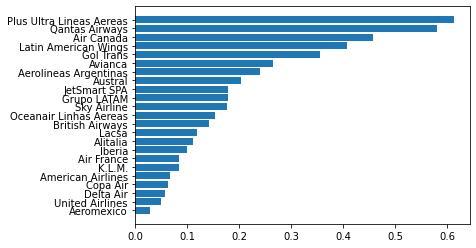

In [47]:
#Por aerolinea 
tasa_areolinea=data.groupby('OPERA').agg({'atraso_15': ['sum','count']}).reset_index()
tasa_areolinea.columns=['TIPO_VUELO','cantidad_atraso', 'cantidad_vuelos']
tasa_areolinea['tasa_atraso']= tasa_areolinea['cantidad_atraso'] / tasa_areolinea['cantidad_vuelos']
tasa_areolinea= tasa_areolinea.sort_values(by=['tasa_atraso'])
plt.barh(tasa_areolinea['TIPO_VUELO'],tasa_areolinea['tasa_atraso'])

<BarContainer object of 3 artists>

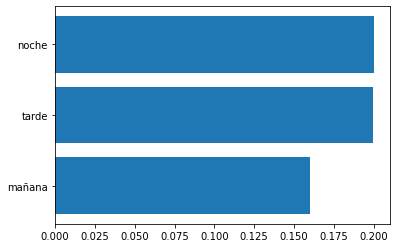

In [48]:
#Por periodo 
data.groupby('periodo_dia').agg({'atraso_15': 'count'}).reset_index()

tasa_periodo_temporada=data.groupby('periodo_dia').agg({'atraso_15': ['sum','count']}).reset_index()
tasa_periodo_temporada.columns=['periodo_dia','cantidad_atraso', 'cantidad_vuelos']
tasa_periodo_temporada['tasa_atraso']= tasa_periodo_temporada['cantidad_atraso'] / tasa_periodo_temporada['cantidad_vuelos']


tasa_periodo_temporada= tasa_periodo_temporada.sort_values(by=['tasa_atraso']) #ordenamos de mayor a menor la columna
plt.barh(tasa_periodo_temporada['periodo_dia'],tasa_periodo_temporada['tasa_atraso'])

<BarContainer object of 2 artists>

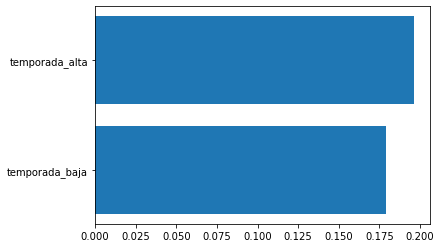

In [50]:
#Temporada 
tasa_atraso_temporada=data.groupby('temporada_alta').agg({'atraso_15': ['sum','count']}).reset_index()
tasa_atraso_temporada.columns=['temporada_alta','cantidad_atraso', 'cantidad_vuelos']
tasa_atraso_temporada['tasa_atraso']= tasa_atraso_temporada['cantidad_atraso']/tasa_atraso_temporada['cantidad_vuelos']
tasa_atraso_temporada

tasa_atraso_temporada= tasa_atraso_temporada.sort_values(by=['tasa_atraso']) #ordenamos de mayor a menor la columna
tasa_atraso_temporada['temporada_alta']= tasa_atraso_temporada['temporada_alta'].apply(lambda x: 'temporada_alta' if x==1 else 'temporada_baja')
plt.barh(tasa_atraso_temporada['temporada_alta'],tasa_atraso_temporada['tasa_atraso'])

<BarContainer object of 7 artists>

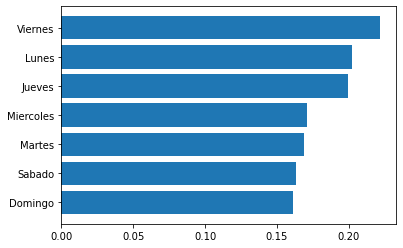

In [51]:
#Dia de la semana
data.groupby('DIANOM').agg({'atraso_15': 'sum'}).reset_index()

tasa_dia_temporada=data.groupby('DIANOM').agg({'atraso_15': ['sum','count']}).reset_index()
tasa_dia_temporada.columns=['periodo_dia','cantidad_atraso', 'cantidad_vuelos']
tasa_dia_temporada['tasa_atraso']= tasa_dia_temporada['cantidad_atraso'] / tasa_dia_temporada['cantidad_vuelos']
tasa_dia_temporada

tasa_dia_temporada= tasa_dia_temporada.sort_values(by=['tasa_atraso']) #ordenamos de mayor a menor la columna
plt.barh(tasa_dia_temporada['periodo_dia'],tasa_dia_temporada['tasa_atraso'])

<BarContainer object of 2 artists>

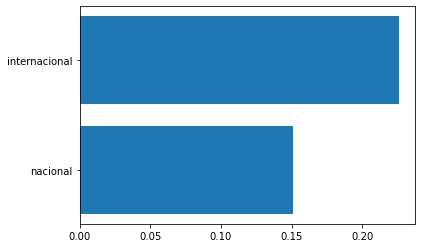

In [52]:
#Por tipo de vuelo 
tasa_i_temporada=data.groupby('TIPOVUELO').agg({'atraso_15': ['sum','count']}).reset_index()
tasa_i_temporada.columns=['TIPO_VUELO','cantidad_atraso', 'cantidad_vuelos']
tasa_i_temporada['tasa_atraso']= tasa_i_temporada['cantidad_atraso'] / tasa_i_temporada['cantidad_vuelos']
tasa_i_temporada

tasa_i_temporada= tasa_i_temporada.sort_values(by=['tasa_atraso']) #ordenamos de mayor a menor la columna
tasa_i_temporada['TIPO_VUELO']=tasa_i_temporada['TIPO_VUELO'].apply(lambda x: 'internacional' if x=='I' else 'nacional')
plt.barh(tasa_i_temporada['TIPO_VUELO'],tasa_i_temporada['tasa_atraso'])

<BarContainer object of 12 artists>

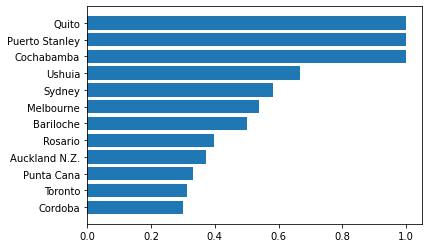

In [53]:
#Por destino (filtramos para los que tengan una tasa > 0.3)
tasa_destino=data.groupby('SIGLADES').agg({'atraso_15': ['sum','count']}).reset_index()
tasa_destino.columns=['SIGLADES','cantidad_atraso', 'cantidad_vuelos']
tasa_destino['tasa_atraso']= tasa_destino['cantidad_atraso'] / tasa_destino['cantidad_vuelos']
tasa_destino=tasa_destino[tasa_destino['tasa_atraso']>0.3]


tasa_destino= tasa_destino.sort_values(by=['tasa_atraso']) #ordenamos de mayor a menor la columna
plt.barh(tasa_destino['SIGLADES'],tasa_destino['tasa_atraso'])

<BarContainer object of 12 artists>

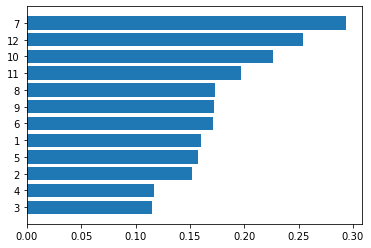

In [54]:
#Por mes 
tasa_dia_mes=data.groupby('MES').agg({'atraso_15': ['sum','count']}).reset_index()
tasa_dia_mes.columns=['MES','cantidad_atraso', 'cantidad_vuelos']
tasa_dia_mes['tasa_atraso']= tasa_dia_mes['cantidad_atraso'] / tasa_dia_mes['cantidad_vuelos']

tasa_dia_mes['MES'] = tasa_dia_mes['MES'].apply(lambda x: str(x))
tasa_dia_mes= tasa_dia_mes.sort_values(by=['tasa_atraso']) #ordenamos de mayor a menor la columna
plt.barh(tasa_dia_mes['MES'],tasa_dia_mes['tasa_atraso'])

### Segun los graficos, las variables que mas importan para el modelo son: Día de la semana, si el vuelo es nacional o internacional, areolinea, destino y mes del año.

### Feature selection

In [17]:
#Podemos observar que el origen es siempre el mismo, por lo que en este caso vamos a prescindir de ésta columna
data['SIGLAORI'].unique()

array(['Santiago'], dtype=object)

Lo mismo ocurre con la hora, utilizaremos la variable creada que determina si el vuelo es en la mañana, tarde o noche.
Respecto a los códigos de ciudad de origen y destino, solo usaremos el nombre de la ciudad de destino. El año no aporta información, solo tenemos dos vuelos el año 2008, debido a que parte el último dia del año 2017 y llegan el 1 enero de 2018. Diff_min no tiene sentido utilizarla, debido a que es la variable de minutos de atraso, pensando que en la información nueva no se dispondrá de éste dato. 

In [18]:
#Seleccionamos las columnas que vamos a trabajar. 
data_selection = data[['DIA','MES','DIANOM','TIPOVUELO','OPERA','SIGLADES','temporada_alta','periodo_dia','atraso_15']]
data_selection.head()

,DIA,MES,DIANOM,TIPOVUELO,OPERA,SIGLADES,temporada_alta,periodo_dia,atraso_15
0,1,1,Domingo,I,American Airlines,Miami,1,noche,0
1,2,1,Lunes,I,American Airlines,Miami,1,noche,0
2,3,1,Martes,I,American Airlines,Miami,1,noche,0
3,4,1,Miercoles,I,American Airlines,Miami,1,noche,0
4,5,1,Jueves,I,American Airlines,Miami,1,noche,0


In [19]:
#Comenzamos con un test chi-cuadrado para ver la relación que tienen con la variable atraso_15
chi2_check = []
categorical_columns = ['DIA','MES','DIANOM','TIPOVUELO','OPERA','SIGLADES','temporada_alta','periodo_dia']
for i in categorical_columns:
    if chi2_contingency(pd.crosstab(data_selection[i],data_selection['atraso_15']))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.appen('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [categorical_columns, chi2_check]).T
res.columns = ['Column','Hypothesis']
print(res)

           Column              Hypothesis
0             DIA  Reject Null Hypothesis
1             MES  Reject Null Hypothesis
2          DIANOM  Reject Null Hypothesis
3       TIPOVUELO  Reject Null Hypothesis
4           OPERA  Reject Null Hypothesis
5        SIGLADES  Reject Null Hypothesis
6  temporada_alta  Reject Null Hypothesis
7     periodo_dia  Reject Null Hypothesis


En todos los casos indica que existe relación con una significancia de 0.05 

In [20]:
# Finalmente codificamos las variables categoricas 
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
data_final = data_selection.copy()
for col in categorical_columns:
    data_final[col] = labelencoder.fit_transform(data_final[col])
data_final.head()

,DIA,MES,DIANOM,TIPOVUELO,OPERA,SIGLADES,temporada_alta,periodo_dia,atraso_15
0,0,0,0,0,5,34,1,1,0
1,1,0,2,0,5,34,1,1,0
2,2,0,3,0,5,34,1,1,0
3,3,0,4,0,5,34,1,1,0
4,4,0,1,0,5,34,1,1,0


### Modelos 

In [21]:
#Separamos la data del target
X = np.array(data_final.drop(['atraso_15'],1))
y = np.array(data_final['atraso_15'])
X.shape

/var/folders/f8/nb0qbzwx3yv5fm3_s5yt7tn40000gn/T/ipykernel_20260/2009130894.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(data_final.drop(['atraso_15'],1))


(68206, 8)

In [26]:
#Separamos en train y test
validation_size = 0.20
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [27]:
#Probamos distintos clasificadores
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),]

In [45]:
log_cols=["Classifier", "Accuracy","Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    score = roc_auc_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100,ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

LogisticRegression
****Results****
Accuracy: 81.3957%
Log Loss: 0.46905048243064823
KNeighborsClassifier
****Results****
Accuracy: 78.3023%
Log Loss: 3.1450458659867007
DecisionTreeClassifier
****Results****
Accuracy: 76.3451%
Log Loss: 7.203084949698122
RandomForestClassifier
****Results****
Accuracy: 79.0793%
Log Loss: 0.7272630727751436
XGBClassifier
****Results****
Accuracy: 82.3486%
Log Loss: 0.42636035634166175
GradientBoostingClassifier
****Results****
Accuracy: 81.6156%
Log Loss: 0.4439695337868982
GaussianNB
****Results****
Accuracy: 81.3957%
Log Loss: 0.46828216974324516


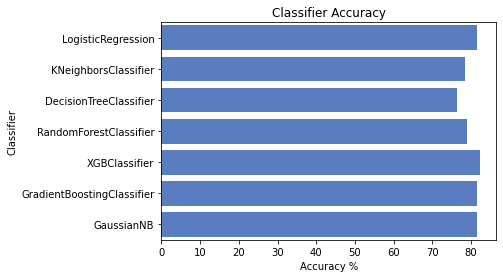

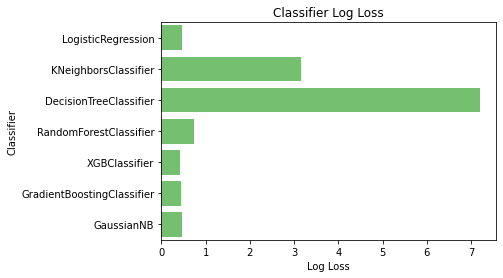

In [31]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [32]:
clf = XGBClassifier()

# Fit with all the training set
clf.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

Text(0.5, 0, 'index of the feature')

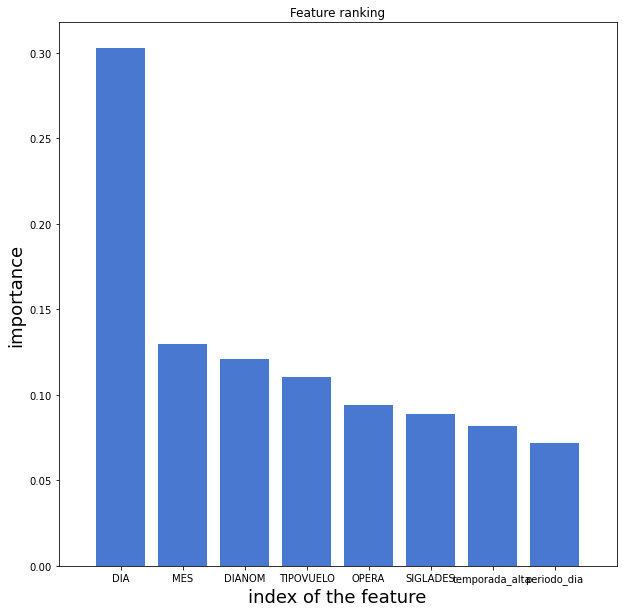

In [39]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = categorical_columns
f, ax = plt.subplots(figsize=(10, 10))
plt.title("Feature ranking", fontsize = 12)
plt.bar(range(X.shape[1]), importances[indices],
    color="b", 
    align="center")
plt.xticks(range(X.shape[1]), feature_names)
plt.xlim([-1, X.shape[1]])
plt.ylabel("importance", fontsize = 18)
plt.xlabel("index of the feature", fontsize = 18)

Seleccionamos el modelo XGBClassifier por su accuracy. Las variables que terminaron siendo más importantes resultaron las que visualmente habiamnos visto según la tasa. Podriamos mejorar la métrica del modelo añadiendo nueva información relevante, por ejemplo el clima (que afecta en gran medida el tiempo de los vuelos) y experiencia de la tripulación